In [1]:
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# https://sdv.dev/SDV/user_guides/single_table/ctgan.html
from ctgan import CTGANSynthesizer
from sklearn.base import BaseEstimator, TransformerMixin


MODELS_PATH = './models'
DATA_PATH = './data/'
dataset = 'adult'
seed = 1
np.random.seed(seed)

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [6]:
X.shape

(150, 4)

In [7]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Train CTGAN with confidence level and black-box model

### CTGAN code structure:
1. **transformer.py** - implements _Mode-specific Normalization_ to continuous values, while categorical are encoded with OHE.

2. **synthesizer.py** - main code, implements fit (training GAN), predict (sample data), save and load. 

3. **models.py** - file contains Discriminator, Generator and Residual models.

4. **sampler.py** - TODO

5. **conditional.py** - TODO

In [6]:
# load rf model
with open(os.path.join(MODELS_PATH, 'adult_rf_0.852.pkl'), 'rb') as rf_fd:
    rf_model = pickle.load(rf_fd)
    
# load rf pipeline
with open(os.path.join(MODELS_PATH, 'adult_rf_0.852_pipeline.pkl'), 'rb') as pl_fd:
    rf_pipeline = pickle.load(pl_fd)

In [7]:
def gen_random_noise(shape):
    mu = 0
    sigma = 1
    z = sigma * np.random.randn(*shape) + mu
    return pd.DataFrame(z)

def plot_losses(hist, title):
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.title(title, fontsize=25)
    plt.plot(hist["loss_g"], '-o', label="loss_g", linewidth=2.0)
    plt.plot(hist["loss_bb"], '-o', label="loss_bb", linewidth=2.0)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Number of epochs", fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.legend(loc='upper right', fontsize=10)
    plt.show()

In [8]:
# ### losses check
# z = gen_random_noise(shape=(10000, 81))
# batch_size = 500
# epochs = 50
# confidence_level = 0.9 
# gen_lr = 2e-5
# losses = ['log', 'l1', 'l2']


# for loss in losses:
#     rf_ctgan = CTGANSynthesizer(batch_size=batch_size, 
#                                 blackbox_model=rf_model, 
#                                 preprocessing_pipeline=rf_pipeline, 
#                                 bb_loss=loss
#                                 )

#     hist = rf_ctgan.fit(train_data=z, 
#                         epochs=epochs,
#                         confidence_level=confidence_level,
#                         gen_lr=gen_lr,
#                         )
#     plot_losses(hist, title=loss + ' loss')
#     print()

Epoch 1, Loss G: 1.1610916683970833, loss_bb: 1.1610916683970833
Epoch 2, Loss G: 1.198509080432207, loss_bb: 1.198509080432207
Epoch 3, Loss G: 1.1998822526762076, loss_bb: 1.1998822526762076
Epoch 4, Loss G: 1.1845500504216817, loss_bb: 1.1845500504216817
Epoch 5, Loss G: 1.1873938040660055, loss_bb: 1.1873938040660055
Epoch 6, Loss G: 1.1683948324204763, loss_bb: 1.1683948324204763
Epoch 7, Loss G: 1.204837998971439, loss_bb: 1.204837998971439
Epoch 8, Loss G: 1.2338602523504454, loss_bb: 1.2338602523504454
Epoch 9, Loss G: 1.2185858136816403, loss_bb: 1.2185858136816403
Epoch 10, Loss G: 1.1604300160680479, loss_bb: 1.1604300160680479
Epoch 11, Loss G: 1.23285016290399, loss_bb: 1.23285016290399
Epoch 12, Loss G: 1.1879014711713936, loss_bb: 1.1879014711713936
Epoch 13, Loss G: 1.1871513044911188, loss_bb: 1.1871513044911188
Epoch 14, Loss G: 1.192981464075365, loss_bb: 1.192981464075365
Epoch 15, Loss G: 1.177284532871295, loss_bb: 1.177284532871295
Epoch 16, Loss G: 1.15589492846

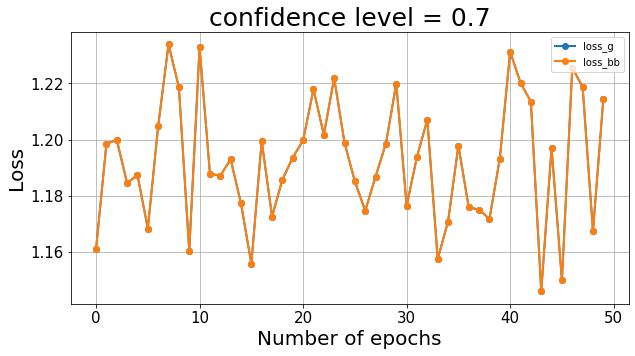

Epoch 1, Loss G: 1.2006232188627086, loss_bb: 1.2006232188627086
Epoch 2, Loss G: 1.1218347102723185, loss_bb: 1.1218347102723185
Epoch 3, Loss G: 1.2441367630971232, loss_bb: 1.2441367630971232
Epoch 4, Loss G: 1.207775494145902, loss_bb: 1.207775494145902
Epoch 5, Loss G: 1.1902677148043928, loss_bb: 1.1902677148043928
Epoch 6, Loss G: 1.2277179244807357, loss_bb: 1.2277179244807357
Epoch 7, Loss G: 1.174563539568687, loss_bb: 1.174563539568687
Epoch 8, Loss G: 1.1304897171767605, loss_bb: 1.1304897171767605
Epoch 9, Loss G: 1.121950298117895, loss_bb: 1.121950298117895
Epoch 10, Loss G: 1.1728877379286222, loss_bb: 1.1728877379286222
Epoch 11, Loss G: 1.1556890938979865, loss_bb: 1.1556890938979865
Epoch 12, Loss G: 1.126445823205349, loss_bb: 1.126445823205349
Epoch 13, Loss G: 1.1998531517083963, loss_bb: 1.1998531517083963
Epoch 14, Loss G: 1.1966776519384998, loss_bb: 1.1966776519384998
Epoch 15, Loss G: 1.200354254651719, loss_bb: 1.200354254651719
Epoch 16, Loss G: 1.150309427

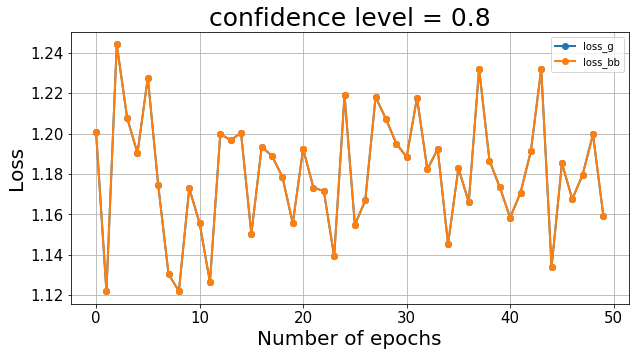

Epoch 1, Loss G: 1.206317519400845, loss_bb: 1.206317519400845
Epoch 2, Loss G: 1.2157193879618184, loss_bb: 1.2157193879618184
Epoch 3, Loss G: 1.3357516862406378, loss_bb: 1.3357516862406378
Epoch 4, Loss G: 1.3416349371789615, loss_bb: 1.3416349371789615
Epoch 5, Loss G: 1.326494901210993, loss_bb: 1.326494901210993
Epoch 6, Loss G: 1.2361602056755083, loss_bb: 1.2361602056755083
Epoch 7, Loss G: 1.3659268970080047, loss_bb: 1.3659268970080047
Epoch 8, Loss G: 1.2703235846488, loss_bb: 1.2703235846488
Epoch 9, Loss G: 1.2891458719164741, loss_bb: 1.2891458719164741
Epoch 10, Loss G: 1.2696062206778054, loss_bb: 1.2696062206778054
Epoch 11, Loss G: 1.2287397954885384, loss_bb: 1.2287397954885384
Epoch 12, Loss G: 1.2495993857388856, loss_bb: 1.2495993857388856
Epoch 13, Loss G: 1.3019109879242674, loss_bb: 1.3019109879242674
Epoch 14, Loss G: 1.2870545550856929, loss_bb: 1.2870545550856929
Epoch 15, Loss G: 1.3066779490384368, loss_bb: 1.3066779490384368
Epoch 16, Loss G: 1.350586546

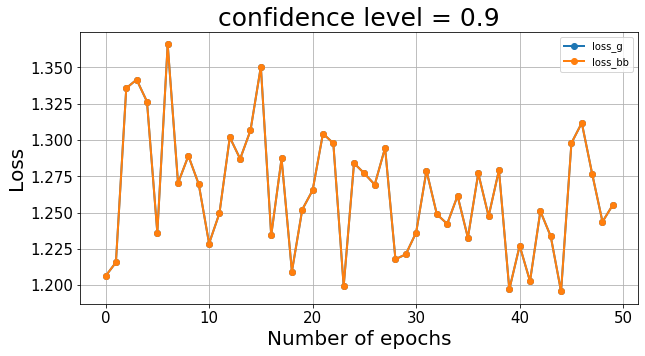

In [9]:
# confidence levels check
z = gen_random_noise(shape=(10000, 81))
batch_size = 500
epochs = 50
gen_lr = 2e-5
loss = 'log'
confidence_levels = [0.7, 0.8, 0.9]
# confidence_levels = [0.7]

for c in confidence_levels:
    rf_ctgan = CTGANSynthesizer(batch_size=batch_size, 
                                blackbox_model=rf_model, 
                                preprocessing_pipeline=rf_pipeline, 
                                bb_loss=loss
                                )

    hist = rf_ctgan.fit(train_data=z, 
                        epochs=epochs,
                        confidence_level=c,
                        gen_lr=gen_lr,
                        )
    
    rf_ctgan.save(f"ctgan_c_{c}.pkl")
    plot_losses(hist, title=f"confidence level = {c}")
    

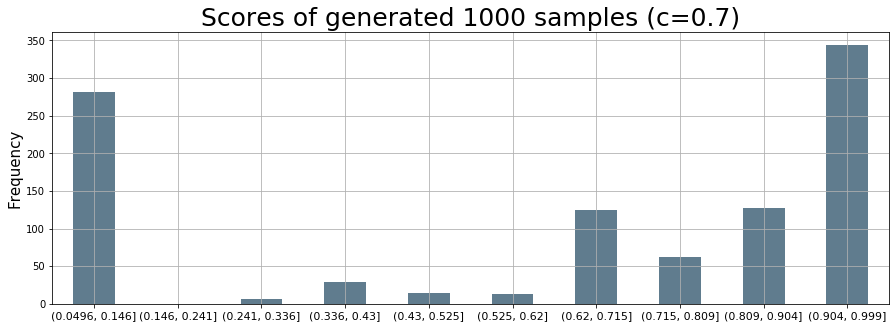

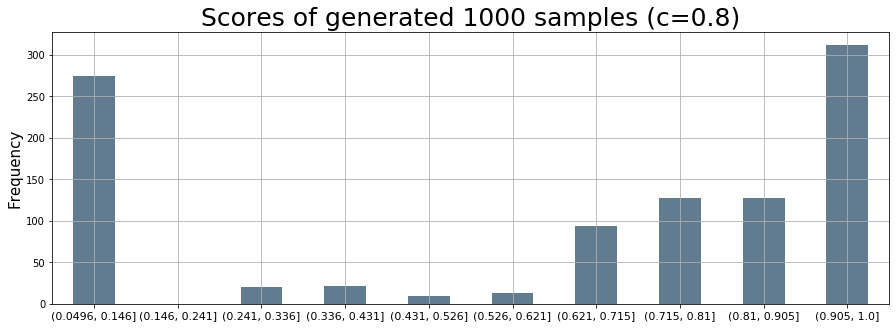

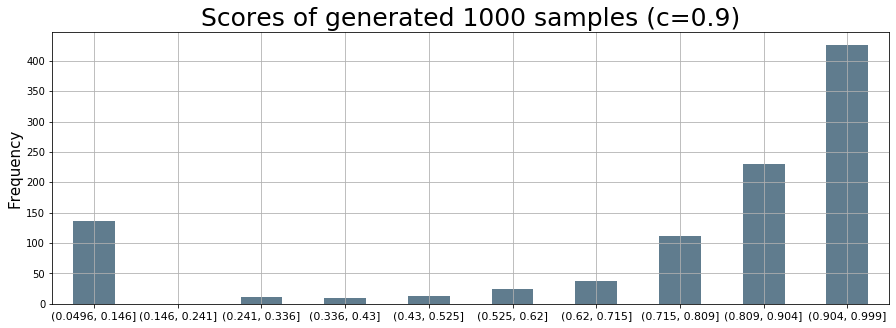

In [14]:
samples = 1000
confidence_levels = [0.7, 0.8, 0.9]
# confidence_levels = [0.7]

for c in confidence_levels:
    rf_ctgan= CTGANSynthesizer.load(f"ctgan_c_{c}.pkl")
    test_data = rf_ctgan.sample(samples)
    y_prob = rf_model.predict_proba(test_data)
    y_conf_gen = y_prob[:, 0]  # confidence scores
    
    counts = pd.value_counts(y_conf_gen, bins=10, sort=False)
    plt.figure()
    ax = counts.plot.bar(rot=0, grid=True, color='#607c8e', figsize=(15,5))
    ax.set_xticklabels([str(interval) for interval in counts.index], fontsize=11)
    ax.set_ylabel('Frequency', fontsize=15)
    ax.set_title(f'Scores of generated 1000 samples (c={c})', fontsize=25)